In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
airline_data = pd.read_csv('../dataset/dataanalysis.csv')
airline_data['Date'] = pd.to_datetime(airline_data['Date'], format='%Y-%m-%d')
airline_data.drop(['Passengers','Passengers_Mean_Imputation'], axis=1, inplace=True)
airline_data.rename({'Passengers_Linear_Interpolation':'Passengers'}, axis=1, inplace=True)
airline_data.set_index('Date', inplace=True)
airline_data

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


## Build and evaluate time series data

In [15]:
# Splitting time series into training and test sets
train_len = 120
train = airline_data[0:train_len]
test = airline_data[train_len:]
y_hat = test.copy()

### Naive method

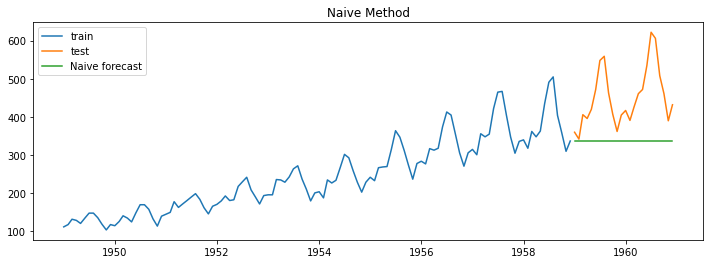

In [17]:
y_hat['naive_forecast'] = train['Passengers'][train_len-1]
# plot train test forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

## Simple average method

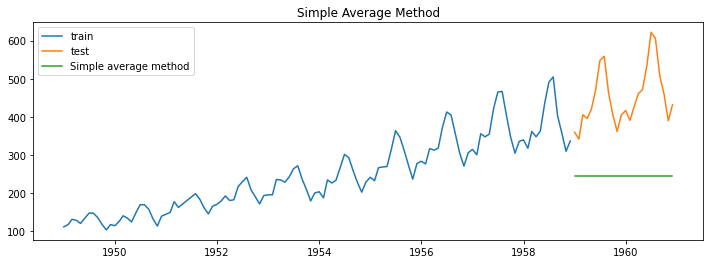

In [19]:
y_hat['avg_forecast'] = train['Passengers'].mean()
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat['avg_forecast'], label='Simple average method')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

## Calculate RMSE and MAPE to evaluate forecast

In [36]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat['naive_forecast'])/test['Passengers'])*100,2)
results = pd.DataFrame({'Method': ['Naive method'], 'MAPE':mape,'RMSE':rmse})
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51


In [37]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat['avg_forecast'])/test['Passengers'])*100,2)
results = results.append({'Method': 'Simple Average', 'MAPE':mape,'RMSE':rmse}, ignore_index=True)
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
1,Simple Average,44.28,219.69


# Auto regressive models

Basic requirements to build Auto Regressive Models
- Stationarity
- Auto Correlation

## The Simple Auto Regressive Model (AR)

- Predicts the future regression as linear regression of one or more past observations
- Model has parameter p called lag order. Lag order is the maximum number of lags used to build p number of past data points to predict future data points


#### Determinne paramter p:
    1. Plot partial autocorrelation function
    2. Select p as the highest lag where partial auto correlation is significantly high
        - For suppose lag value of 1, 2, 4 and 12 has a significant level of confidence. i.e., significant level of influence on future observation (refer the red line). Hence, the value of 'p' will be set to 12 since that is the highest lag where partial autocorrelation is significantly high. 
    3. Build regressive model equation
    
$$
\hat{y}_{t}=\beta_{0}+\beta_{1} y_{t-1}+\beta_{2} y_{t-2}+\beta_{4} y_{t-4}+\beta_{12} y_{t-12}
$$
The past values which have a significant value are 1, 2, 4 and 12. Therefore, in the regression model the independent variables $y_{t-1}$, $y_{t-2}$, $y_{t-4}$ and $y_{t-12}$. which are the observations from the past has been taken to predict the dependent variable $\hat{y}_{t}$



In [1]:
# Partial auto correlation fucntion

In [2]:
# Split into train and test sets
train_airline_data_boxcox = airline_data['']